# Исследование факторов, влиящих на успешность игры.

У нас имеются данные о продажах игр за 2016 год, включающие оценки пользователей и экпертов, жанры и платформы за 2016 год.  


**Цель исследования** - определить, какие факторы влияют на успешность игры. 

Что может влиять:

* игровая платформа
* жанр
* оценки критиков
* оценки пользователей

Эта информация позволит спланировать продажную кампанию на 2017 год.



Исследование будет проходить в несколько этапов:
* обзор данных
* предобработка данных (выявление и устранение пропусков, дубликатов, подозрительных значений, обогащение данных)
* проверка гипотез (с использованием сводных таблицы и графиков)

## Обзор данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [5]:
games = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')

In [6]:
# Посмотрим на полученные данные.
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15733,Katekyoo Hitman Reborn! Kindan no Yami no Delta,PS2,2008.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16574,Smart Boy's Winter Wonderland,DS,2008.0,Misc,0.01,0.00,0.00,0.00,NaN,tbd,E
1896,Fisherman's Bass Club,PS2,2002.0,Sports,0.53,0.41,0.00,0.14,NaN,tbd,E
5297,Command & Conquer: Red Alert 3 Ultimate Edition,PS3,2009.0,Strategy,0.14,0.15,0.00,0.06,NaN,NaN,NaN
13268,Ms Saga: A New Dawn,PS2,2005.0,Role-Playing,0.02,0.02,0.00,0.01,65.0,8.6,E10+
9163,Monster House,GC,2006.0,Adventure,0.11,0.03,0.00,0.00,60.0,tbd,E10+
2121,NHL 2004,PS2,2003.0,Sports,0.47,0.37,0.00,0.12,85.0,7.6,E
11850,Sigma Harmonics,DS,2008.0,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
8818,FIFA Soccer 2002,PS,2001.0,Sports,0.08,0.06,0.00,0.01,81.0,6.4,E
11172,WRC 5: FIA World Rally Championship,PS3,2015.0,Sports,0.02,0.05,0.00,0.01,NaN,NaN,NaN


In [7]:
# Посмотрим общую информацию по данным.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info"> В этом разделе мы загрузили данные из файла и посмотрели на основные характеристики получившейся таблицы. В трех столбцах 'Critic_score', 'User_score', 'Rating' присутствует большое количество пропущенных значений, разберемся с этим в следующей части. </div>

## Предобработка данных

In [8]:
# Проверим на дубликаты.
games.duplicated().sum()

0

In [9]:
# Проверим на неявные дубликаты.
games.duplicated(subset=['Name', 'Platform']).sum()

5

In [10]:
duplicated_games = games[games.duplicated(subset=['Name', 'Platform'])]
duplicated_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [11]:
# Преположу, что одни и те же игры на одних и тех же платформах могли выпускаться в разные годы. Тогда получится, что это 
# не дубликаты, а перевыпуск уже существующей игры. Посмотрим еще раз, но уже используя год.
games[games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [12]:
# Удалим строки, у котрых совпадают название, платформа и год выпуска.
games = games.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release']).reset_index()

In [13]:
# Приведем имена колонок к нижнему регистру.
#games.columns = map(str.lower, games.columns)

games.columns = games.columns.str.lower()


# Преобразуем значения в столбце с годом выпуска и оценкой критиков к целочисленному типу.
games['year_of_release'] = games['year_of_release'].fillna(0).astype('int')


In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16712 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  int64  
 4   genre            16712 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     8136 non-null   float64
 10  user_score       10013 non-null  object 
 11  rating           9948 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


In [15]:
# Количество пропущенных значения в столбцах с жанром и названием игры совпадает, скорее всего это одни и те же строки.
# Посмотрим на них.
games.loc[games['genre'].isna()]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [16]:
# Удалим эти строки, в них пропущенны почти все значения, имеющие смысл для нашего исследования. 
games = games.loc[~games['genre'].isna()]


In [17]:
# Посмотрим на столбец с оценками критиков.
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [18]:
# Посмотрим на столбец с оценками пользователей. Он имеет строковые значения и дробные числа в строковом формате.
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
# Заменим неопределенные значения 'tbd'  на NaN и приведем к вещественному типу.
games['user_score'] = games['user_score'].replace('tbd', np.nan).astype('float')


Мой вывод по пропускам в столбцах с оценками критиков и пользователей.</b> Оставим пропуски, как есть, т.к. действительно непонятно, что с ними можно сделать. Пропуски в оценках критиков и пользователей могли появиться, если игра новая и еще не получила оценок, или если она достаточна старая и ее никто не оценивал. Также, существует вероятность, что оценки просто не были внесены в таблицу. Использование заглушки скорее всего исказит результат при исследовании зависимости оценок от продаж. Также значение 'tbd' - to be determined - означает, что оценка для этой игры еще не определена. Я решила, что имеет смысл также заменить ее на NaN, чтобы спокойно можно было производить расчеты по столбцу.

In [20]:
# Посмотрим на столбец рейтинга фильма.
games['rating'].unique()

# Е - everyone
# M - mature, 17+
# T - teens
# E10+ - 10 and older
# K-A - kids to adults, старое название для категории Е
# AO - adults only, 18+
# EC - early childhood
# RP - rating pending, используется для рекламных презентаций и демоверсий.

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
# Удалим строки с рейтингом RP 
games = games.loc[games['rating'] != 'RP']

# Поменяем значение К-А на Е, т.к. это наименования одной и той же категории.
games.loc[games['rating'] == 'K-A', 'rating'] = 'E' 

# Пропусков в этой строке много, но непонятно как их можно заполнит, поэтому оставим как есть.

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
# Я сгруппировала датафрейм по названию игры и ее рейтингу, посчитала количество каждой игры,
# далее оставила только игры, названия которых повторяются.
# Потом удалила столбец с количествами игр, он больше не понадобится.

games_rating = (pd.DataFrame(games.groupby(['name','rating'])['name'].count())
               .rename(columns={'name':'count'})
               .reset_index()
               .query('count > 1')
               .drop('count', axis=1))
games_rating

,name,rating
5,007: Quantum of Solace,T
15,18 Wheeler: American Pro Trucker,E
17,187: Ride or Die,M
18,2002 FIFA World Cup,E
19,2010 FIFA World Cup South Africa,E
...,...,...
6230,iCarly,E
6231,iCarly 2: iJoin The Click!,E
6235,nail'd,E10+
6236,pro evolution soccer 2011,E


In [23]:
# Дальше я хочу воспользоваться таблицей как словарем. Чтобы заполнить пропущенный рейтинг по рейтингу игры с
# таким же названием.
# Я объединяю 2 таблицы, удаляю лишний столбец и переименовываю оставшийся обратно в 'rating'.
games = games.merge(games_rating, on='name', how='left').drop('rating_y', axis=1).rename(columns={'rating_x':'rating'})
games


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16867,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16868,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16869,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16870,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
# Оставшиеся столбцы заполним заглушкой, чтобы при последующем анализе по продажам учесть этот сегмент.
games['rating'] = games['rating'].fillna('unknown')

In [25]:
# Посчитаем суммарные продажи во всех регионах.
games['sales_all'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16872 entries, 0 to 16871
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16872 non-null  int64  
 1   name             16872 non-null  object 
 2   platform         16872 non-null  object 
 3   year_of_release  16872 non-null  int64  
 4   genre            16872 non-null  object 
 5   na_sales         16872 non-null  float64
 6   eu_sales         16872 non-null  float64
 7   jp_sales         16872 non-null  float64
 8   other_sales      16872 non-null  float64
 9   critic_score     8269 non-null   float64
 10  user_score       7711 non-null   float64
 11  rating           16872 non-null  object 
 12  sales_all        16872 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.8+ MB


В этом разделе были проверены и обработана явные и неявные дубликаты в строках, названия колонок приведены к нижнему регистру, изменены типы данных на более удобный для восприятия и дальнейшего анализа, добавлен столбец с суммарными продажами игр. В столбцах 'critic_score', 'user_score', 'rating' обработаны пропущенные значения.


##  Исследовательский анализ данных

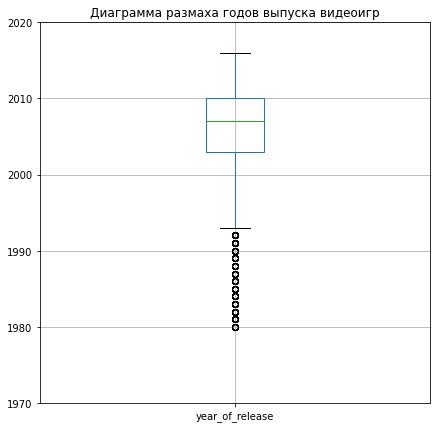

In [27]:
# Посмотрим на распределение игр по годам выпуска.
games.boxplot('year_of_release', figsize=(7, 7))
plt.ylim(1970, 2020);
plt.title('Диаграмма размаха годов выпуска видеоигр');


In [28]:
# Строки, которые находятся за пределами 1,5 межквартильных размахов, будем считать выбросами и удалим.
games = games.query('year_of_release > 1993')


In [29]:
# Выберем платформы с наибольшими продажами.
big_platforms = (games
                 .pivot_table(index='platform', values='sales_all', aggfunc='sum')
                 .sort_values(by='sales_all', ascending=False))
print(big_platforms)

big_platforms = big_platforms.query('sales_all > 250')

big_platforms

          sales_all
platform           
PS2         1260.94
X360         972.72
PS3          943.39
Wii          897.03
DS           810.47
PS           729.25
PS4          318.01
GBA          317.53
PSP          295.94
3DS          258.37
XB           257.29
PC           253.99
N64          218.09
GC           201.99
XOne         161.66
GB           152.08
SNES          84.67
WiiU          82.46
PSV           54.82
SAT           33.59
DC            15.95
GEN            8.13
WS             1.42
NG             1.23
SCD            0.36
TG16           0.16
NES            0.11
3DO            0.10
PCFX           0.03


,sales_all
platform,
PS2,1260.94
X360,972.72
PS3,943.39
Wii,897.03
DS,810.47
PS,729.25
PS4,318.01
GBA,317.53
PSP,295.94


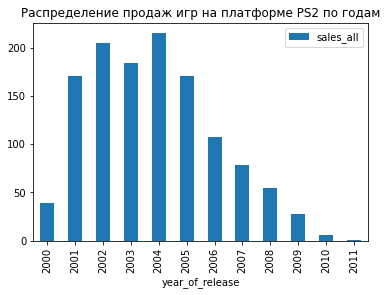

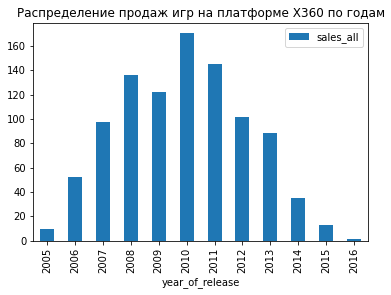

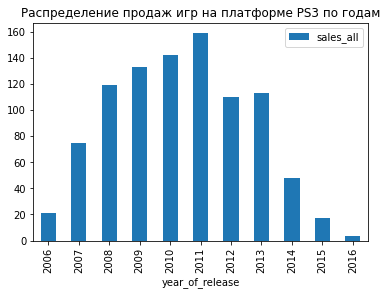

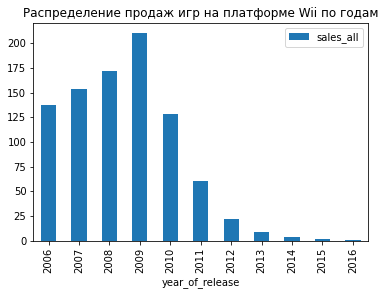

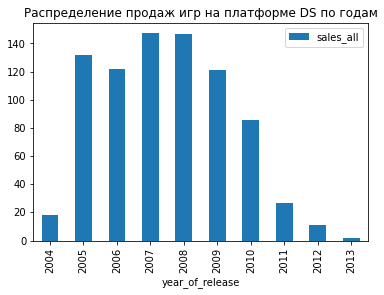

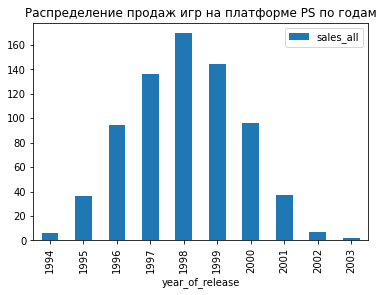

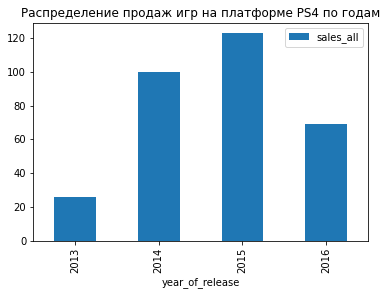

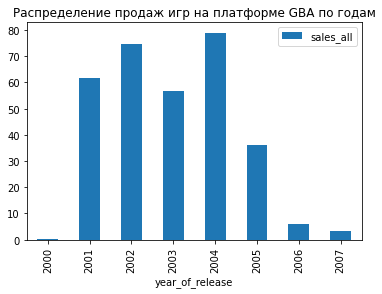

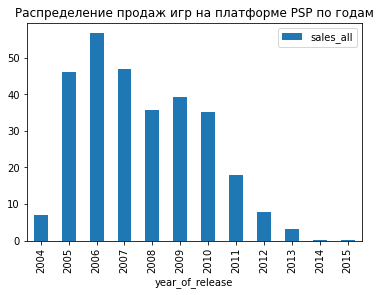

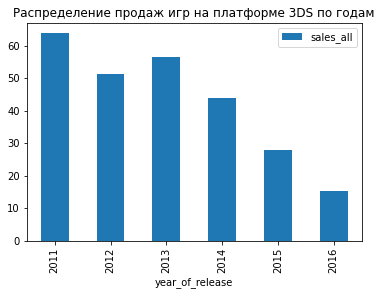

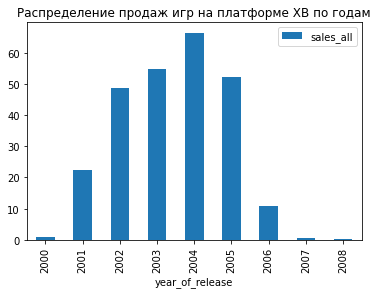

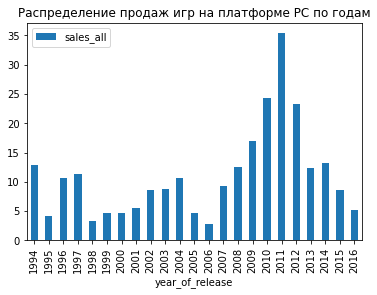

In [30]:
# Построим для каждой платформы распределение продаж по годам.
for i in big_platforms.index:
    (games.loc[games['platform'] == i]
     .pivot_table(index='year_of_release', values='sales_all', aggfunc='sum')
     .plot(kind='bar', ))
    plt.title(f'Распределение продаж игр на платформе {i} по годам')


Большинство платформ живет примерно 10-11 лет c достижением пика продаж приблизительно в середине жизни. Среди платформ с большими объемами продаж также попадаются совсем молодые платформы (3DS, PS4). Выделяется платформа PC, игры на которой успешно продаются более 20 лет.

На основании этого вывода заключим, что для прогноза на 2017 год нужно взять период не более 5 лет - время достижения максимальной популярности большинства платформ с большими объемами продаж. Таким образом мы отбросим старые и неактуальные платформы, вроде PS2, и сможем увидеть, если какая-то новая платформа начинает набирать популярность.
Возьмем данные с 2011 года.


In [31]:
# Оставим данные за 2011 год и страше.
games_after2011 = games.query('year_of_release >= 2011')

# Еще раз посмотрим на продажи на платформах по годам.
big_platforms_after2011 = (games_after2011
                 .pivot_table(index='platform', values='sales_all', aggfunc='sum')
                 .sort_values(by='sales_all', ascending=False))

print(big_platforms_after2011)


          sales_all
platform           
PS3          451.39
X360         384.62
PS4          318.01
3DS          258.37
XOne         161.66
PC            98.19
Wii           95.70
WiiU          82.46
PSV           54.82
DS            39.08
PSP           29.01
PS2            0.45


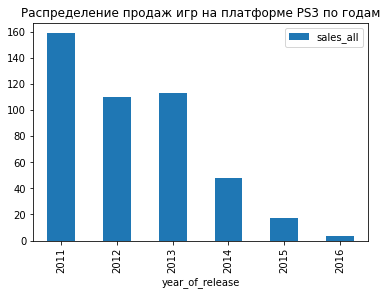

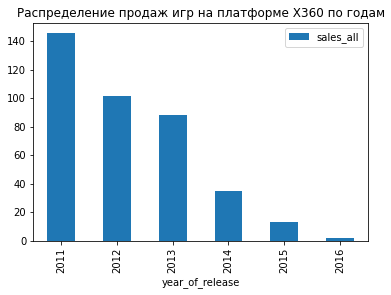

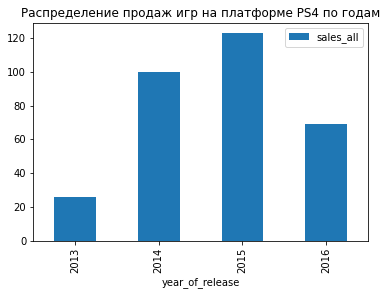

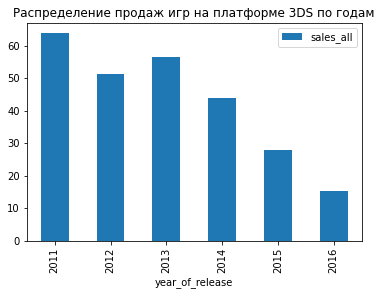

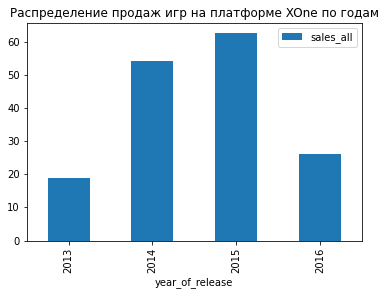

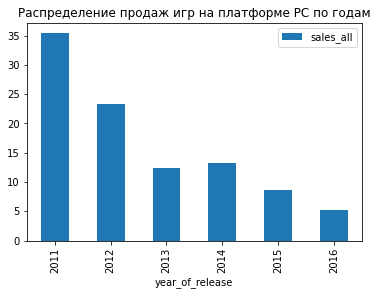

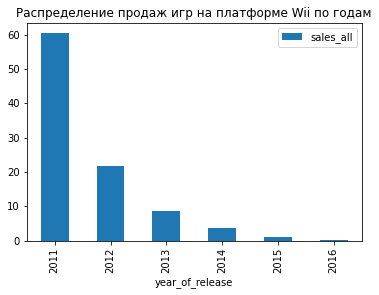

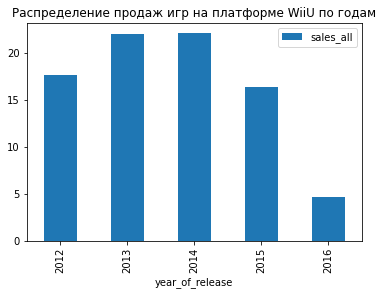

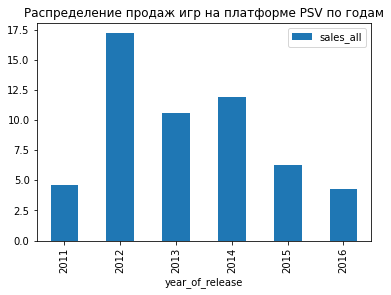

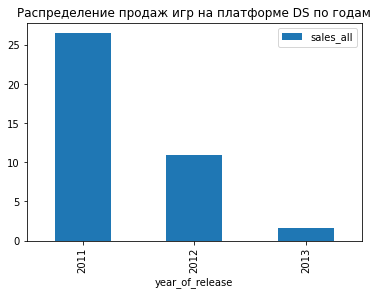

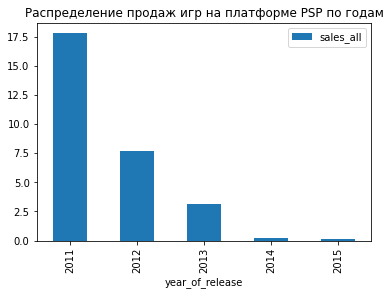

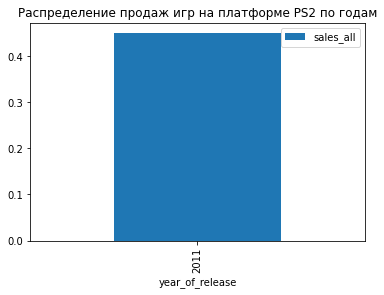

In [32]:
# Построим распределение.
for i in big_platforms_after2011.index:
    (games_after2011.loc[games_after2011['platform'] == i]
     .pivot_table(index='year_of_release', values='sales_all', aggfunc='sum')
     .plot(kind='bar', ))
    plt.title(f'Распределение продаж игр на платформе {i} по годам')

Ни одна из платформ не показывает роста за период 2011-2016 годов. Возможно, из-за того, что данные за 2016 год еще неполные. Но можно отметить несколько неплохих вариантов - PS4, XOne, 3DS и PC. При этом РС показывает стабильные продажи более 20 лет))


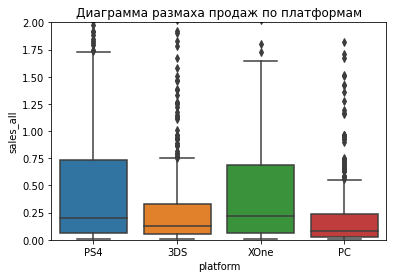

In [55]:
choosen_ones = ['PS4', 'XOne', '3DS', 'PC']

# Воспользуемся библиотекой Seaborn для построения графиков с усами.
choosen_ones_games = games_after2011.query('platform in @choosen_ones')
sns.boxplot(x='platform', y='sales_all', data=choosen_ones_games);
plt.ylim(0,2)
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

In [34]:
# Для анализа возьмем платформы с самыми большими продажами в 2015-16 годах.
(games_after2011
 .query('(platform in @big_platforms_after2011.index) and ((year_of_release == 2015) or (year_of_release == 2016))')
 .pivot_table(index='platform', values='sales_all', aggfunc='sum')
 .sort_values(by='sales_all', ascending=False))
 

,sales_all
platform,
PS4,192.02
XOne,88.63
3DS,42.92
PS3,21.15
WiiU,20.95
X360,14.42
PC,13.87
PSV,10.50
Wii,1.32


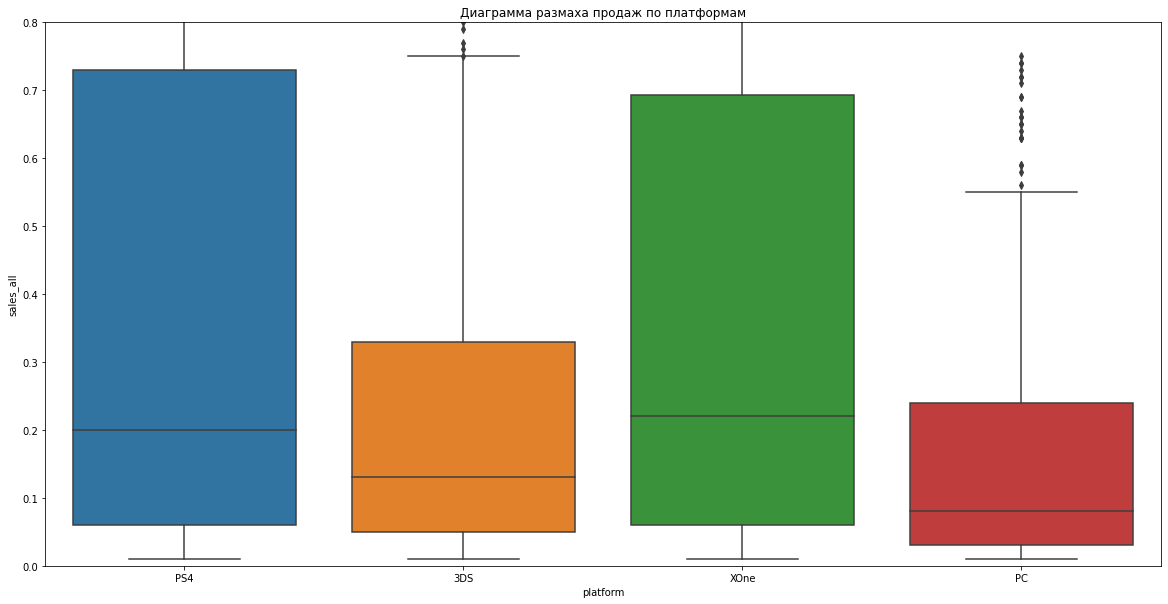

In [35]:
plt.figure(figsize=(20, 10))
choosen_ones_games = games_after2011.query('platform in @choosen_ones')
sns.boxplot(x='platform', y='sales_all', data=choosen_ones_games);
plt.ylim(0, .8)
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

Из выбранных платформ неплохо выглядят PS4 и XOne, их средние значения и верхние границы больше, чем у других платформ.



In [38]:
# Посмотрим, как зависят между собой оценки пользователей и критиков внутри одной платформы.
ps4_games = games_after2011.query('platform == "PS4"')
ps4_games

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16656,16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16659,16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16682,16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16686,16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


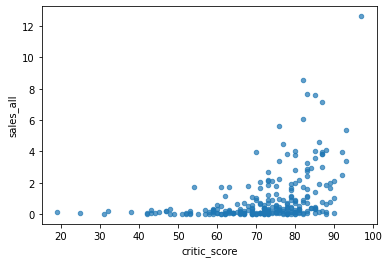

In [39]:
ps4_games.plot(x='critic_score', y='sales_all', kind='scatter', alpha=0.7);

Можно заметить, что не всегда с увеличением оценки критиков растут и продажи. Зависимость не слишком явная - есть игры с высокими оценками, но их продажи не велики.

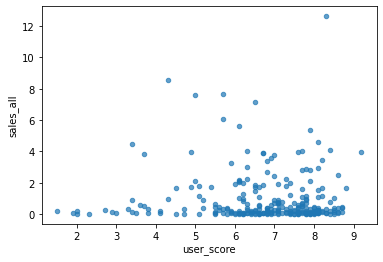

In [40]:
# Посмотрим на оценки пользователей и продажи.
ps4_games.plot(x='user_score', y='sales_all', kind='scatter', alpha=0.7);

На данной диаграмме не наблюдается зависимость продаж от оценок пользователей.

In [41]:
# Убедимся с помощью матрицы корреляции.
ps4_games.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
index,1.000000,0.400071,-0.575665,-0.541979,-0.381770,-0.591936,-0.461618,-0.015352,-0.593628
year_of_release,0.400071,1.000000,-0.246102,-0.208420,-0.060923,-0.234265,-0.021411,0.152455,-0.234753
na_sales,-0.575665,-0.246102,1.000000,0.774733,0.463058,0.942608,0.419905,-0.020835,0.925430
eu_sales,-0.541979,-0.208420,0.774733,1.000000,0.464322,0.940717,0.346847,-0.048951,0.955369
jp_sales,-0.381770,-0.060923,0.463058,0.464322,1.000000,0.492475,0.320918,0.171342,0.523935
other_sales,-0.591936,-0.234265,0.942608,0.940717,0.492475,1.000000,0.414359,-0.035600,0.997946
critic_score,-0.461618,-0.021411,0.419905,0.346847,0.320918,0.414359,1.000000,0.555926,0.411235
user_score,-0.015352,0.152455,-0.020835,-0.048951,0.171342,-0.035600,0.555926,1.000000,-0.031988
sales_all,-0.593628,-0.234753,0.925430,0.955369,0.523935,0.997946,0.411235,-0.031988,1.000000


Результат получился аналогичный, у оценок критиков и продаж очень слабая зависимость, корреляция 0,42. Оценки пользователей и продажи - корреляция -0,03.

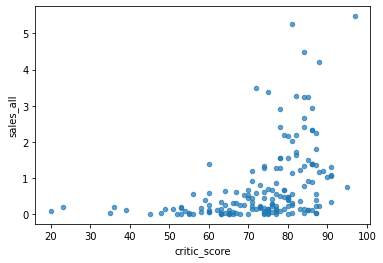

In [42]:
# Убедимся в полученных результатах, проанализировав оценки и продажи на других платформах.
xone_games = games_after2011.query('platform == "XOne"')
xone_games.plot(x='critic_score', y='sales_all', kind='scatter', alpha=0.7);

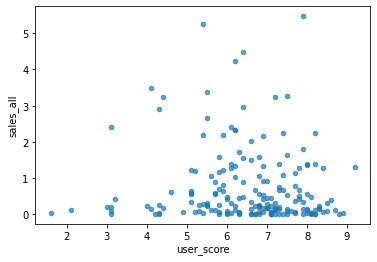

In [43]:
xone_games.plot(x='user_score', y='sales_all', kind='scatter', alpha=0.7);

In [44]:
xone_games.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
index,1.000000,0.417929,-0.648753,-0.602214,-0.292141,-0.671607,-0.479171,0.043651,-0.671477
year_of_release,0.417929,1.000000,-0.239158,-0.194947,-0.127087,-0.241194,0.063919,0.079383,-0.237561
na_sales,-0.648753,-0.239158,1.000000,0.754259,0.417737,0.987713,0.394720,-0.071273,0.969515
eu_sales,-0.602214,-0.194947,0.754259,1.000000,0.421162,0.845303,0.376515,-0.055596,0.892111
jp_sales,-0.292141,-0.127087,0.417737,0.421162,1.000000,0.436271,0.200645,0.069924,0.448444
other_sales,-0.671607,-0.241194,0.987713,0.845303,0.436271,1.000000,0.417102,-0.071349,0.995123
critic_score,-0.479171,0.063919,0.394720,0.376515,0.200645,0.417102,1.000000,0.469589,0.421717
user_score,0.043651,0.079383,-0.071273,-0.055596,0.069924,-0.071349,0.469589,1.000000,-0.070450
sales_all,-0.671477,-0.237561,0.969515,0.892111,0.448444,0.995123,0.421717,-0.070450,1.000000


Результат на платформе XOne - слабая зависимость продаж и оценок критиков (корреляция 0,43) и полное отсутствие зависимости продаж и оценок пользователей (корреляция -0,08).

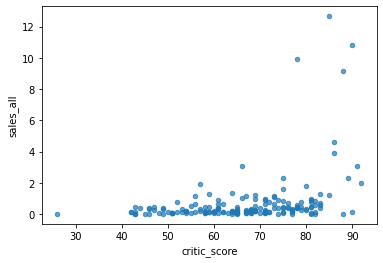

In [45]:
ds_games = games_after2011.query('platform == "3DS"')
ds_games.plot(x='critic_score', y='sales_all', kind='scatter', alpha=0.7);

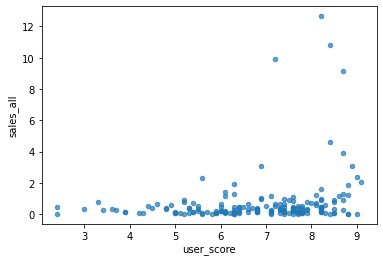

In [46]:
ds_games.plot(x='user_score', y='sales_all', kind='scatter', alpha=0.7);

In [47]:
ds_games.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
index,1.000000,0.169156,-0.446585,-0.445886,-0.511424,-0.449920,-0.393872,-0.164591,-0.509833
year_of_release,0.169156,1.000000,-0.098508,-0.086166,0.042080,-0.093482,0.194660,0.197812,-0.052275
na_sales,-0.446585,-0.098508,1.000000,0.943517,0.664650,0.990937,0.335253,0.202354,0.950043
eu_sales,-0.445886,-0.086166,0.943517,1.000000,0.686492,0.971194,0.310224,0.168350,0.951930
jp_sales,-0.511424,0.042080,0.664650,0.686492,1.000000,0.672807,0.348714,0.274643,0.852422
other_sales,-0.449920,-0.093482,0.990937,0.971194,0.672807,1.000000,0.322598,0.186603,0.958170
critic_score,-0.393872,0.194660,0.335253,0.310224,0.348714,0.322598,1.000000,0.752427,0.348926
user_score,-0.164591,0.197812,0.202354,0.168350,0.274643,0.186603,0.752427,1.000000,0.224391
sales_all,-0.509833,-0.052275,0.950043,0.951930,0.852422,0.958170,0.348926,0.224391,1.000000


Результат на платформе 3DS - слабая зависимость продаж и оценок критиков (корреляция 0,35), но также присутствует и небольшая зависимость продаж и оценок пользователей (корреляция 0,23).

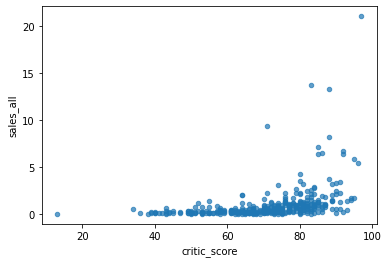

In [48]:
ps3_games = games_after2011.query('platform == "PS3"')
ps3_games.plot(x='critic_score', y='sales_all', kind='scatter', alpha=0.7);

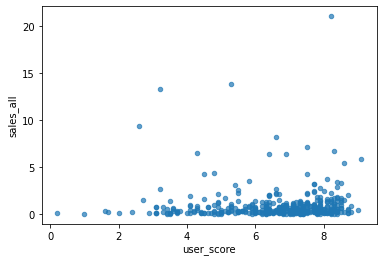

In [49]:
ps3_games.plot(x='user_score', y='sales_all', kind='scatter', alpha=0.7);

In [50]:
ps3_games.corr()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all
index,1.000000,0.283380,-0.504259,-0.435564,-0.333940,-0.447161,-0.574902,-0.157462,-0.494169
year_of_release,0.283380,1.000000,-0.150800,-0.098591,-0.056850,-0.104263,-0.034870,-0.216875,-0.124702
na_sales,-0.504259,-0.150800,1.000000,0.836909,0.335554,0.874894,0.401650,0.008147,0.937625
eu_sales,-0.435564,-0.098591,0.836909,1.000000,0.355609,0.979310,0.340809,-0.014563,0.968954
jp_sales,-0.333940,-0.056850,0.335554,0.355609,1.000000,0.360627,0.202036,0.172664,0.436524
other_sales,-0.447161,-0.104263,0.874894,0.979310,0.360627,1.000000,0.351831,0.013589,0.978055
critic_score,-0.574902,-0.034870,0.401650,0.340809,0.202036,0.351831,1.000000,0.566282,0.381401
user_score,-0.157462,-0.216875,0.008147,-0.014563,0.172664,0.013589,0.566282,1.000000,0.013264
sales_all,-0.494169,-0.124702,0.937625,0.968954,0.436524,0.978055,0.381401,0.013264,1.000000


Результат на платформе PS3 - слабая зависимость продаж и оценок критиков (корреляция 0,38) и почти полное отсутствие зависимости продаж и оценок пользователей (корреляция 0,01).

По результатам проверки 4-х платформ на зависимость между оценками критиков и пользователей и продажами, можно сделать вывод, что существует очень слабая линейная зависимость между оценками критиков и продажами. Между оценками пользователей и продажами почти нет зависимости (коэффициент корреляции от -0,07 до 0,01), исключение - платформа 3DS, у нее зависимость чуть более выражена, корреляция 0,23.

In [51]:
# Посмотрим на распределение продаж по жанрам.
games_after2011.pivot_table(index='genre', values='sales_all', aggfunc='median').sort_values(by='sales_all', ascending=False)

,sales_all
genre,
Shooter,0.410
Sports,0.200
Platform,0.185
Fighting,0.180
Racing,0.160
Role-Playing,0.150
Action,0.130
Misc,0.130
Simulation,0.110


В результате оценки по медианным продажам самый популярный жанр шутеры, за ним идут спортивные игры и платформеры.

## Портрет пользователей по регионам

In [52]:
# Посмотрим на популярность платформ по регионам.
platforms_na = (games_after2011
                      .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                      .sort_values(by='na_sales', ascending=False))
platforms_eu = (games_after2011
                      .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                      .sort_values(by='eu_sales', ascending=False))
platforms_jp = (games_after2011
                      .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                      .sort_values(by='jp_sales', ascending=False))

display(platforms_na[:5])
display(platforms_eu[:5])
display(platforms_jp[:5])

,na_sales
platform,
X360,229.16
PS3,170.20
PS4,111.23
XOne,95.07
3DS,83.05


,eu_sales
platform,
PS3,165.76
PS4,141.75
X360,118.54
3DS,61.39
PC,57.00


,jp_sales
platform,
3DS,100.62
PS3,49.51
PSP,24.04
PSV,21.85
PS4,15.99


Продажи игр на различных платформах неравномерны в разных регионах В Северной Америке и Европе в первую тройку входят одни и те же платформы - Х360, РS3 и PS4, также в этих регионах популярна 3DS. Из различий отметим, что в Америке достаточно популярна XOne, а в  Европе - РС. 
Японские пользователи немного отличаются от европейских и американских, самай популярная платформа в Японии - 3DS. РS3 и PS4 также входят в топ, а также платформы PSP и PSV, которых нет ни в Америке, ни в Европе.


In [53]:
# Посмотрим на популярность жанров по регионам.
genres_na = (games_after2011
                      .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                      .sort_values(by='na_sales', ascending=False))
genres_eu = (games_after2011
                      .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                      .sort_values(by='eu_sales', ascending=False))
genres_jp = (games_after2011
                      .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                      .sort_values(by='jp_sales', ascending=False))

display(genres_na[:5])
display(genres_eu[:5])
display(genres_jp[:5])


,na_sales
genre,
Action,232.79
Shooter,194.43
Sports,114.41
Role-Playing,83.78
Misc,70.80


,eu_sales
genre,
Action,201.32
Shooter,148.02
Sports,89.51
Role-Playing,62.30
Racing,43.45


,jp_sales
genre,
Role-Playing,79.87
Action,63.66
Misc,17.60
Fighting,12.38
Platform,12.13


По популярности жанров опять выделяется Япония. Если в Америке и Европе лидируют экшены, шутеры и спорт, то в Японии на первом месте рпг, экшены на втором сете,а спорта и вовсе нет в топ-5. Зато достаточно популярны файтеры и игры категории Misc. 

В целом, прослеживается та же закономерности, что региональных продажах по платформам - Америка и Европа очень схожи, Япония выделяется.

In [54]:
# Посмотрим, как влияет рейтинг игр на продажи по регионам.
rating_na = (games_after2011
                      .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                      .sort_values(by='na_sales', ascending=False))
rating_eu = (games_after2011
                      .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                      .sort_values(by='eu_sales', ascending=False))
rating_jp = (games_after2011
                      .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                      .sort_values(by='jp_sales', ascending=False))

display(rating_na[:5])
display(rating_eu[:5])
display(rating_jp[:5])

,na_sales
rating,
M,308.45
E,171.86
unknown,124.86
E10+,123.26
T,111.39


,eu_sales
rating,
M,250.26
E,141.89
unknown,118.64
T,85.91
E10+,79.16


,jp_sales
rating,
unknown,138.28
E,36.71
T,33.43
M,26.14
E10+,11.27


Суммарные продажи по рейтингам подтверждают результат, полученный при обследовании жанров. В Америке и Европе лидируют экшен и шутеры, большую часть игр этих жанров можно отнести к категории М (для взрослых). В Японии М лишь на четвертом месте. Большой объем продаж во всех регионах приходится также на рейтинг unknown. Возможно, в Японии больше пользуются популярностью локальные игры, которые не оцениваются по системе ESRB.

## Проверка гипотез

### Первая гипотеза

Н_0: средние пользовательские рейтинги платформ XOne и РС одинаковые.

Н_1: средние пользовательские рейтинги платформ XOne и РС различаются.



In [ ]:
# Для проверки гипотез воспользуемся t-тестом с уровнем значимости 0,05.
# Укажем аргумент equal_var=False, т.к. у нас нет уверенности, что выборки будут одного размера.
# Но возьмем только выборки без пропущенных значений рейтингов.

sample_1 = games_after2011.loc[(games['platform'] == 'XOne') & (~games_after2011['user_score'].isna()), 'user_score']
sample_2 = games_after2011.loc[(games['platform'] == 'PC') & (~games_after2011['user_score'].isna()), 'user_score']
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print(f'p-значение: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-значение: 0.625447255690384
Не получилось отвергнуть нулевую гипотезу


В результате проверки получаем, что в 63% случаев мы получим одинаковые средние рейтинги для двух платформ.

### Вторая гипотеза

Н_0: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н_1: средние пользовательские рейтинги жанров Action и Sports различаются.

In [ ]:
# Повторим ту же процедуру, что и для первой гипотезы. 

sample_1 = games_after2011.loc[(games['genre'] == 'Action') & (~games_after2011['user_score'].isna()), 'user_score']
sample_2 = games_after2011.loc[(games['genre'] == 'Sports') & (~games_after2011['user_score'].isna()), 'user_score']
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print(f'p-значение: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.901144611531914e-19
Отвергаем нулевую гипотезу


Вероятность получить одинаковые средние рейтинги по двум жанрам статистически незначима.

## Общий вывод

**Постановка задачи.**
Имеются данные о продаже игр на разных игровых платформах за несколько лет. Нужно изучить, какие факторы оказывают влияние на успешность игры, определить предпочтения пользователей из разных регионов, а также проверить статистические гипотезы.

В ходе исследования проведена предобработка данных - данные проверены на дубликаты и пропуски, заполнены пропущенные значения. 

В рамках исследовательского анализа выявлен важный для прогноза период, рассмотрено распределение продаж по платформам, влияние оценок критиков и пользователей на продажи в рамках одной платформы, а также распределение продаж по жанрам.

**Влияние платформы на продажи.**

Срок жизни платформы примерно 10-11 лет, поэтому для определения потенциально популярных продуктов имеет смысл выбирать более новые платформы, не старше 4-5 лет. Как наиболее перспективные, можно отметить платформы Play Station 4, Nintendo 3DS, Xbox One. Однако, это не касается PC, на этой платформе игры успешно продаются на протяжении всего периода наблюдений.


**Влияние оценок критиков и пользователей на продажи.**

Сильной зависимости продаж от оценок критиков не выявлено, они влияют лишь немного. Также не выявлено абсолютно никакой зависимости между продажами и оценками пользователей. Похоже на то, что пользователи при выборе игры полагаются на собственные предпочтения.


**Жанры и продажи.**

Самыми успешными жанрами оказались шутеры, спортивные игры и платформеры.


**Платформы по регионам и продажи.**

В каждом регионе есть свои особенности, при этом Северная Америка и Европа очень схожи между собой, Япония отличается. Похоже, различие культур сказывается и на выборе видео-игр. 

Отметим, что в Японии наибольшей популярностью пользуются платформы японских компаний Nintendo и Sony. Причем среди платформ Sony более популярны более старые версии Play Station 3 и PSP. Возможно, Play Station 4 и Vita только начинают набирать популярность. 

В Северной Америке самой популярной оказалась платформа Xbox 360 от американского Microsoft. Также в топе оказалась и ее обновленная версия Xbox One, скорее всего она тоже только набирает популярность. Такая же ситуация и с Play Station - более старая версия выше в списке.

В Европе первое место занимает Play Station 3, второе - ее обновленная версия Play Station 4. Тенденция налицо - новые платформы еще не успели набрать популярность, но уже находдятся в топе. Также в Европе впервые по сравнению с другими регионами встречается PC, платформа проверенная временем. Значит ли это, что европейские пользователи более традиционны по сравнению с североамериканскими?

Северная Америка топ-5 платформ:
* Xbox 360
* Play Station 3
* Play Station 4
* Xbox One
* Nintendo 3DS

Европа топ-5 платформ:
* Play Station 3
* Play Station 4
* Xbox 360
* Nintendo 3DS
* PC

Япония топ-5 платформ:
* Nintendo 3DS
* Play Station 3
* Play Station Portable
* Play Station Vita
* Play Station 4


**Жанры и продажи.**

По жанрам ситуация по регионам такая же, как и по платформам - Европа и Северная Америка похожи, Япония выделяется. Видимо, культурные различия накладывают свой отпечаток.

Во всех регионах пользователи выбирают экшен и РПГ игры, но в Америке и Европе также большой популярностью пользуются шутеры и спортивные игры, а в Японии - файтеры и платформеры.

Северная Америка топ-5 жанров:
* Action
* Shooter
* Sports
* Role-playing
* Misc

Европа топ-5 жанров:
* Action
* Shooter
* Sports
* Role-playing
* Rasing

Япония топ-5 жанров:
* Role-playing
* Action
* Misc
* Fighting
* Platform


**Рейтинг ESRB и продажи.**

По результатам исследования, влияние рейтинга игры на продажи не обнаружено. Большой объем продаж приходится на игры без рейтинга ESRB. Вероятно, большое количество игр просто не оценивается по этой системе.

